## EDA - Netflix Movies and TV Shows (Movies and TV Shows listings on Netflix)

In [1]:

#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

#Import data

data = pd.read_csv('./data/netflix_titles.csv')

## Overview

In [3]:

#data head
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
#Quantidade de valores NA em cada feature
data.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

## Overview columns

### Column "show_id"

In [6]:
data['show_id'].nunique()

6234

<ul>
    <li>Pode-se observar que a coluna <b>show_id</b> contém de fato um único id para cada registro, <b>varivável qualitativa nominal</b>.</li>
</ul>

### Column "type"

In [7]:
data['type'].value_counts(normalize=True)

Movie      0.684151
TV Show    0.315849
Name: type, dtype: float64

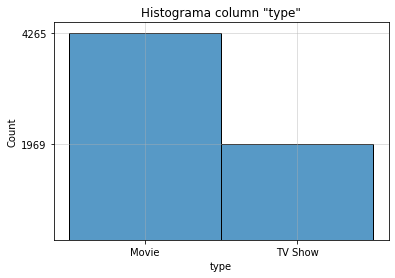

In [8]:

sns.histplot(x='type', data=data)
plt.title('Histograma column "type"')
plt.yticks(data['type'].value_counts())
plt.grid(alpha=0.5)

plt.show()

<ul>
    <li><b>Variável qualitativa nominal</b>, pode-se observar que o número de registros contendo "Movie" (Filmes) é superior a "TV Show" (Séries), sendo, <br>
        - Movie: 4257<br>
        - TV Show: 1967, <br>
        Em termos percentuais, aproximadamente,<br>
        - Movie: 68%<br>
        - TV Show: 32%<br>
        </li>
</ul>

### Column "title"

In [9]:
#Quantidade de valores unicos
data['title'].nunique()

6172

In [10]:

# Contém todos os títulos que aparecem mais de uma vez

same_title = data['title'].value_counts()[data['title'].value_counts() > 1].keys().sort_values()
same_title


#data['title'].value_counts()[data['title'].value_counts() > 1] #contém todos os títulos que aparecem mais de uma vez e a quantidade de vezes que aparecem. 

Index(['Aquarius', 'Benji', 'Bleach', 'Blood Money', 'Carrie', 'Charmed',
       'Deep', 'Don', 'Drive', 'Frank and Cindy', 'Godzilla', 'Hostages',
       'Kakegurui', 'Lavender', 'Life', 'Limitless',
       'Little Baby Bum: Nursery Rhyme Friends', 'Locked Up', 'Love',
       'Love O2O', 'Lovesick', 'Manhunt', 'Maniac', 'Oh My Ghost', 'One Day',
       'People You May Know', 'Persona', 'Prince', 'Retribution',
       'Rosario Tijeras', 'Sarkar', 'Shadow', 'She's Gotta Have It', 'Skins',
       'Solo', 'Supergirl', 'The Birth Reborn', 'The Code', 'The Gift',
       'The In-Laws', 'The Innocents', 'The Iron Lady', 'The Lovers',
       'The Oath', 'The Outsider', 'The Saint', 'The Secret', 'The Silence',
       'Tiger', 'Top Boy', 'Troy', 'Tunnel', 'Us and Them', 'We Are Family',
       'Wet Hot American Summer', 'Zoo', 'Zoom'],
      dtype='object')

In [11]:

# Registros que contém o mesmo título organizados.
rowsSame_title = data[data['title'].isin(same_title)].sort_values(by=['title'])
rowsSame_title


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5905,80026224,TV Show,Aquarius,NaN,"David Duchovny, Gethin Anthony, Grey Damon, Em...",United States,"June 16, 2017",2016,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas","Amid the turmoil of 1960s LA, two cops and a p..."
3441,80113667,Movie,Aquarius,Kleber Mendonça Filho,"Sonia Braga, Maeve Jinkings, Irandhir Santos, ...","Brazil, France","January 13, 2017",2016,UR,146 min,"Dramas, International Movies",The final holdout in her historic beachside bu...
2159,80204923,Movie,Benji,Brandon Camp,"Gabriel Bateman, Darby Camp, Kiele Sanchez, Je...","United Arab Emirates, United States","March 16, 2018",2018,TV-PG,87 min,"Children & Family Movies, Dramas",A determined dog comes to the rescue and helps...
1969,296682,Movie,Benji,Joe Camp,"Benji, Deborah Walley, Peter Breck, Edgar Buch...",United States,"March 6, 2018",1974,G,86 min,"Children & Family Movies, Classic Movies",After lovable abandoned mutt Benji is adopted ...
5724,70204957,TV Show,Bleach,NaN,"Masakazu Morita, Fumiko Orikasa, Yuki Matsuoka...",Japan,"November 3, 2018",2006,TV-14,3 Seasons,"Anime Series, International TV Shows",After teenager Ichigo Kurosaki acquires superp...
...,...,...,...,...,...,...,...,...,...,...,...,...
2320,60021299,Movie,Wet Hot American Summer,David Wain,"Janeane Garofalo, David Hyde Pierce, Michael S...",United States,"March 1, 2019",2001,R,98 min,"Comedies, Cult Movies, Independent Movies",Everyone wants a final shot at action on the l...
3131,80993648,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
5656,80011206,TV Show,Zoo,NaN,"James Wolk, Kristen Connolly, Nonso Anozie, No...",United States,"October 3, 2017",2017,TV-14,3 Seasons,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy",When animal species all over the world begin a...
3456,81221873,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Pode-se observar que a coluna <b>title</b> contém alguns valores repetidos, dando uma rápida olhada esses registros aparentam ter mesmo title mas apresentarem características diferentes, apresentam o mesmo título mas não são a mesma obra. 

<ul>
    <li><b>Variável qualitativa nomial.</b></li>
</ul><br>
Países diferentes e/ou anos diferentes podem contér títulos com mesmo nome mas representarem obras totalmente diferentes. 

### Column "listed_in"

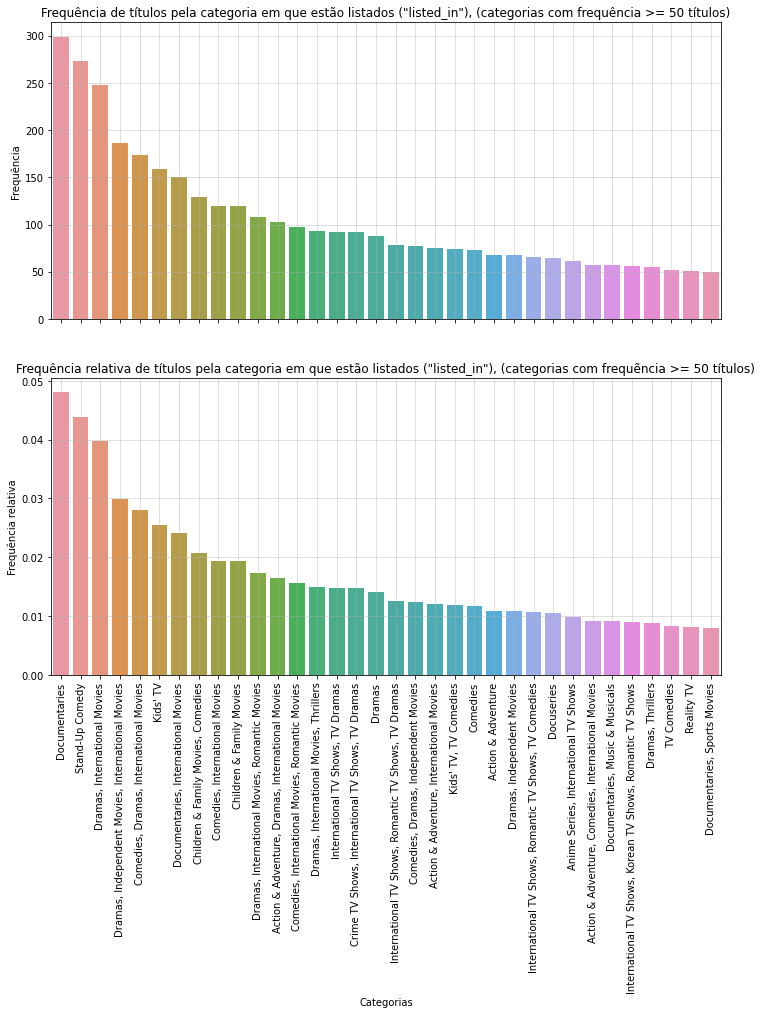

In [87]:

listed_inMaiorIgual50 = data['listed_in'].value_counts()[data['listed_in'].value_counts() >= 50]


fig, (axe1,axe2) = plt.subplots(2,1,figsize=(12,12), sharex=True)
#fig.subplots_adjust(hspace=0.1)


axe1 = sns.barplot(x=listed_inMaiorIgual50.keys(), y=listed_inMaiorIgual50, ax=axe1)
axe1.set_title('Frequência de títulos pela categoria em que estão listados ("listed_in"), (categorias com frequência >= 50 títulos)')
axe1.set_ylabel('Frequência')
#axe1.set_xlabel('Categorias')
axe1.set_xticklabels(listed_inMaiorIgual50.keys(), rotation='vertical')
axe1.grid(alpha=0.5)


axe2 = sns.barplot(x=listed_inMaiorIgual50.keys(), y=listed_inMaiorIgual50/len(data['listed_in']), ax=axe2)
axe2.set_title('Frequência relativa de títulos pela categoria em que estão listados ("listed_in"), (categorias com frequência >= 50 títulos)')
axe2.set_ylabel('Frequência relativa')
axe2.set_xlabel('Categorias')
axe2.set_xticklabels(listed_inMaiorIgual50.keys(),rotation='vertical')
axe2.grid(alpha=0.5)

plt.show()

<ul>
    <li><b>Variável categorica nominal.</b></li>
</ul><br>
Pode-se observar que a maioria dos títulos estão listados em <b>Documentaries</b>.  Alguns títulos são listados em mais de uma categoria. (Categorias com menos de 50 títulos não são mostrados no gráfico acima.)

In [85]:

#Registros em "listed_in" e a frequência com que ocorrem (registros com frequência menor que 50)
data['listed_in'].value_counts()[data['listed_in'].value_counts() < 50]


Movies                                                               49
Action & Adventure, Sci-Fi & Fantasy                                 49
Horror Movies, International Movies                                  48
Crime TV Shows, International TV Shows, Spanish-Language TV Shows    45
Dramas, International Movies, Music & Musicals                       44
                                                                     ..
Action & Adventure, Comedies, Horror Movies                           1
TV Comedies, TV Horror, TV Thrillers                                  1
Action & Adventure, Anime Features, Classic Movies                    1
Crime TV Shows, International TV Shows, Reality TV                    1
Comedies, Independent Movies, Music & Musicals                        1
Name: listed_in, Length: 427, dtype: int64

Pode-se observar que alguns títulos estão listados em tantas categorias de forma que seu registro em <b>listed_in</b> aparece apenas uma vez. Esses dados podem ser trabalados de forma a quebrar essas strings com várias classificações em features separadas, isso pode ser pensando mais adiante. 

### Column "release_year"

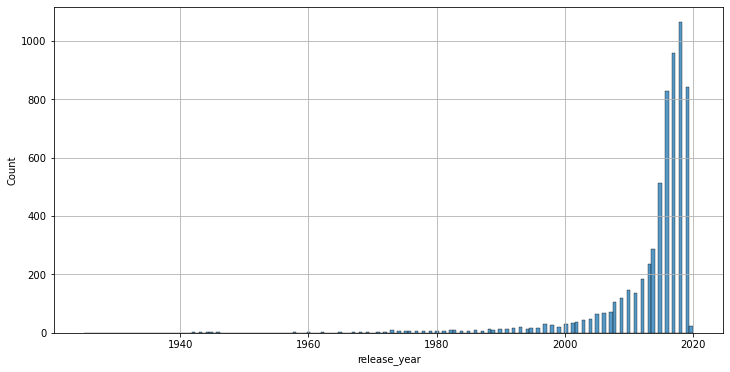

In [91]:

fig, axe = plt.subplots(figsize=(12,6))
sns.histplot(data['release_year'], ax=axe)
axe.grid()

plt.show()

In [14]:
data['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
                          ..
Patricia Font              1
Tom Green                  1
Pradip Kurbah              1
Ian Nelms, Eshom Nelms     1
Sally Potter               1
Name: director, Length: 3301, dtype: int64

In [15]:
data['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [16]:

#dicionário para a coluna "rating" based in [2] and [3]

rating_mean = {
    'TV-MA':'TV Adultos (18+)',
    'TV-14':'TV Jovens adultos (16+)',
    'TV-PG':'TV Crianças mais velhas (7+)',
    'R':'Filmes Adultos (18+)',
    'PG-13':'Filmes Adolescentes (13+)',
    'NR':'Filmes Adultos (18+)',
    'PG':'Filmes Crianças mais velhas (7+)',
    'TV-Y7':'TV Crianças mais velhas (7+)',
    'TV-G':'TV Crianças (Todos)',
    'TV-Y':'TV Crianças (Todos)',
    'TV-Y7-FV':'TV Crianças mais velhas (7+)',
    'G':'Filmes Crianças (Todos)',
    'UR':'Não classificado',
    'NC-17':'Filmes Adultos (18+)'
}

def new_rating(x):
    for k, v in zip(rating_mean.keys(), rating_mean.values()):
        if x == k:
            return v
            
data['mean_rating'] = data['rating'].apply(new_rating)

In [17]:

data.dropna(subset=['mean_rating'], inplace=True);


In [18]:

data['mean_rating'].value_counts()

TV Adultos (18+)                    2027
TV Jovens adultos (16+)             1698
TV Crianças mais velhas (7+)         965
Filmes Adultos (18+)                 728
TV Crianças (Todos)                  292
Filmes Adolescentes (13+)            286
Filmes Crianças mais velhas (7+)     184
Filmes Crianças (Todos)               37
Não classificado                       7
Name: mean_rating, dtype: int64

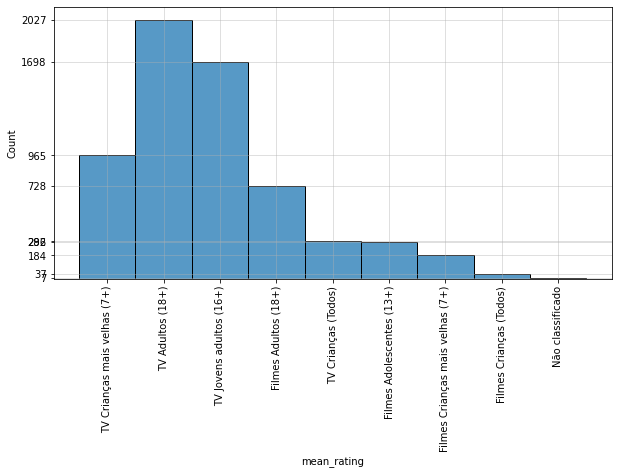

In [19]:

fig, axe = plt.subplots(figsize=(10,5))
axe = sns.histplot(x='mean_rating', data = data)
plt.xticks(rotation='vertical')
plt.grid(alpha=0.5)
plt.yticks(data['mean_rating'].value_counts().values)


plt.show()

<AxesSubplot:xlabel='release_year', ylabel='Count'>

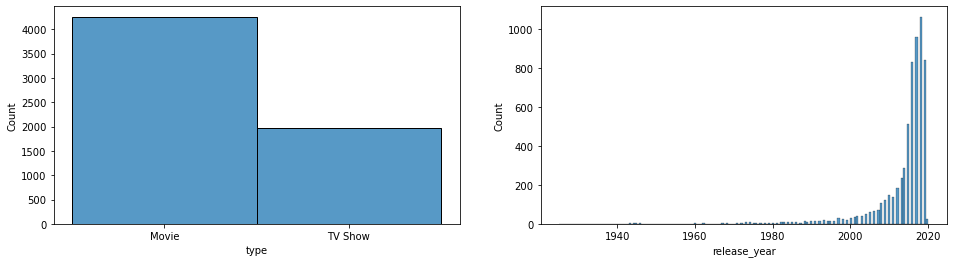

In [20]:

fig, axe = plt.subplots(1,2, figsize=(16,4))

sns.histplot(data = data['type'], ax=axe[0])
sns.histplot(data = data['release_year'], ax=axe[1])

In [21]:
data['country'].value_counts().keys()

Index(['United States', 'India', 'United Kingdom', 'Japan', 'Canada',
       'South Korea', 'Spain', 'France', 'Mexico', 'Turkey',
       ...
       'Finland, France', 'Mexico, Netherlands',
       'United Kingdom, Ukraine, United States', 'Australia, France',
       'United States, Canada, Ireland', 'United States, Nicaragua',
       'Austria, Czech Republic', 'United States, Kazakhstan',
       'Netherlands, Germany, Italy, Canada', 'Egypt, France'],
      dtype='object', length=554)

## References

[1]https://www.kaggle.com/shivamb/netflix-shows<br>
[2]https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ<br>
[3]https://www.atlascinemas.net/ratings.html<br>
[4]https://stackoverflow.com/questions/19155718/select-pandas-rows-based-on-list-index df.isin()<br>
[5]https://stackabuse.com/rotate-axis-labels-in-matplotlib/<br>